What is the distribution of conservation_status for animals?

Are certain types of species more likely to be endangered?

Are the differences between species and their conservation status significant?

Which species were spotted the most at each park?

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp

In [100]:
obs = pd.read_csv('observations.csv')

obs.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [101]:
species = pd.read_csv('species_info.csv')

species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [102]:
species['category'].value_counts()

category
Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: count, dtype: int64

In [103]:
species['conservation_status'].value_counts()

conservation_status
Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: count, dtype: int64

In [104]:
cons_status = species['conservation_status'].value_counts().rename_axis('conservation_status').reset_index(name='counts')
cons_status

,conservation_status,counts
0,Species of Concern,161
1,Endangered,16
2,Threatened,10
3,In Recovery,4


<BarContainer object of 4 artists>

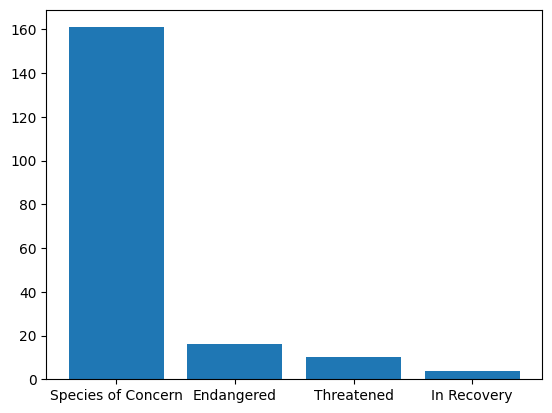

In [105]:
plt.bar(cons_status.conservation_status, height=cons_status.counts)

distribution of conservation status:<br>
161 species of concern, 16 endangered, 10 threatened, 4 in recovery

In [106]:
species.loc[species['conservation_status'] == 'Endangered'].value_counts(['category','conservation_status']).reset_index()

,category,conservation_status,count
0,Mammal,Endangered,7
1,Bird,Endangered,4
2,Fish,Endangered,3
3,Amphibian,Endangered,1
4,Vascular Plant,Endangered,1


mammals more likely to be endangered than other species

In [107]:
species_status = species.value_counts(['category','conservation_status']).reset_index()
species_status

,category,conservation_status,count
0,Bird,Species of Concern,72
1,Vascular Plant,Species of Concern,43
2,Mammal,Species of Concern,28
3,Mammal,Endangered,7
4,Nonvascular Plant,Species of Concern,5
5,Reptile,Species of Concern,5
6,Bird,Endangered,4
7,Fish,Species of Concern,4
8,Fish,Threatened,4
9,Amphibian,Species of Concern,4


In [111]:
mammals = species.loc[species['category'] == 'Mammal'].value_counts(['category','conservation_status']).reset_index()
birds = species.loc[species['category'] == 'Bird'].value_counts(['category','conservation_status']).reset_index()
fish = species.loc[species['category'] == 'Fish'].value_counts(['category','conservation_status']).reset_index()
amphibians = species.loc[species['category'] == 'Amphibian'].value_counts(['category','conservation_status']).reset_index()
plants = species.loc[species['category'] == 'Vascular Plant'].value_counts(['category','conservation_status']).reset_index()

In [117]:
endangered = species.loc[species['conservation_status'] == 'Endangered'].value_counts(['category']).reset_index(name='endangered')
endangered

,category,endangered
0,Mammal,7
1,Bird,4
2,Fish,3
3,Amphibian,1
4,Vascular Plant,1


In [128]:
summary_table = species_status.pivot(index='category', columns='conservation_status', values='count')
summary_table

conservation_status,Endangered,In Recovery,Species of Concern,Threatened
category,,,,
Amphibian,1.0,NaN,4.0,2.0
Bird,4.0,3.0,72.0,NaN
Fish,3.0,NaN,4.0,4.0
Mammal,7.0,1.0,28.0,2.0
Nonvascular Plant,NaN,NaN,5.0,NaN
Reptile,NaN,NaN,5.0,NaN
Vascular Plant,1.0,NaN,43.0,2.0


In [130]:
#endangered vs concern in birds vs mammals
sp.chi2_contingency([[4,72],
                     [7,28]])

Chi2ContingencyResult(statistic=4.295550153793575, pvalue=0.03821223116195418, dof=1, expected_freq=array([[ 7.53153153, 68.46846847],
       [ 3.46846847, 31.53153153]]))